In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv("v2.csv")


In [3]:
df3 = pd.read_csv("v3.csv")

In [4]:
df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [5]:
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN


In [6]:
null_count_per_column = df2.isnull().sum()
total_null_count = null_count_per_column.sum()


In [7]:
null_count_per_column

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    139
TableName         0
Unnamed: 5      265
dtype: int64

In [8]:
for column in df2.columns:
    if df2[column].dtype == 'object':  # Check if the column is categorical
        mode_value = df2[column].mode()[0]  # Get the mode of the column
        df2[column].fillna(mode_value, inplace=True)  # Fill null values with the mode

print(df2)

    Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE       Europe & Central Asia          High income   
2            AFG                  South Asia           Low income   
3            AFW       Europe & Central Asia          High income   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa  Lower middle income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0    Fiscal year end: March 31; reporting period fo...   
1    26 countries, stretching from the Red Sea in t... 

In [9]:
df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Fiscal year end: March 31; reporting period fo...,Aruba,NaN
1,AFE,Europe & Central Asia,High income,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,Europe & Central Asia,High income,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


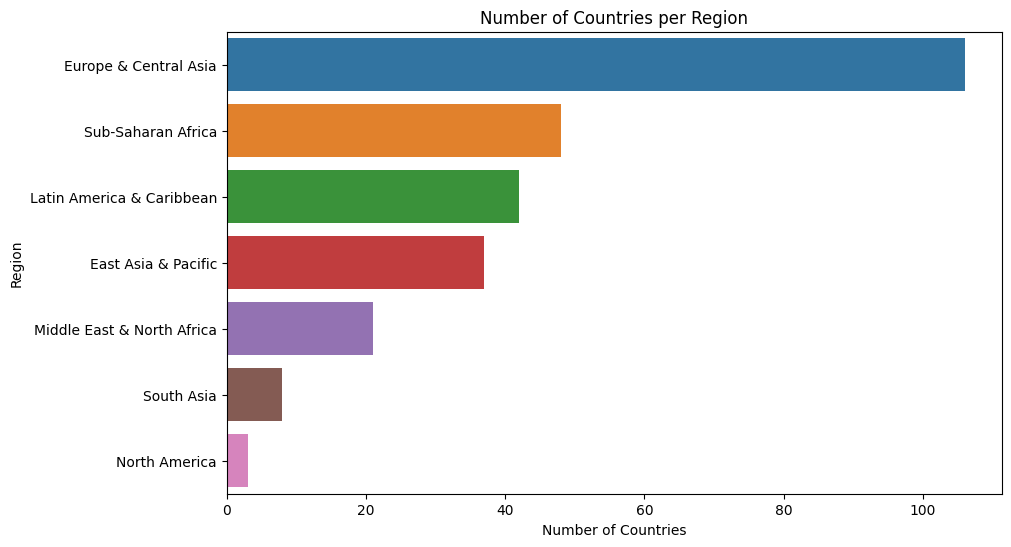

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Region', data=df2, order=df2['Region'].value_counts().index)
plt.title('Number of Countries per Region')
plt.xlabel('Number of Countries')
plt.ylabel('Region')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High income'),
  Text(0, 1, 'Lower middle income'),
  Text(0, 2, 'Upper middle income'),
  Text(0, 3, 'Low income')])

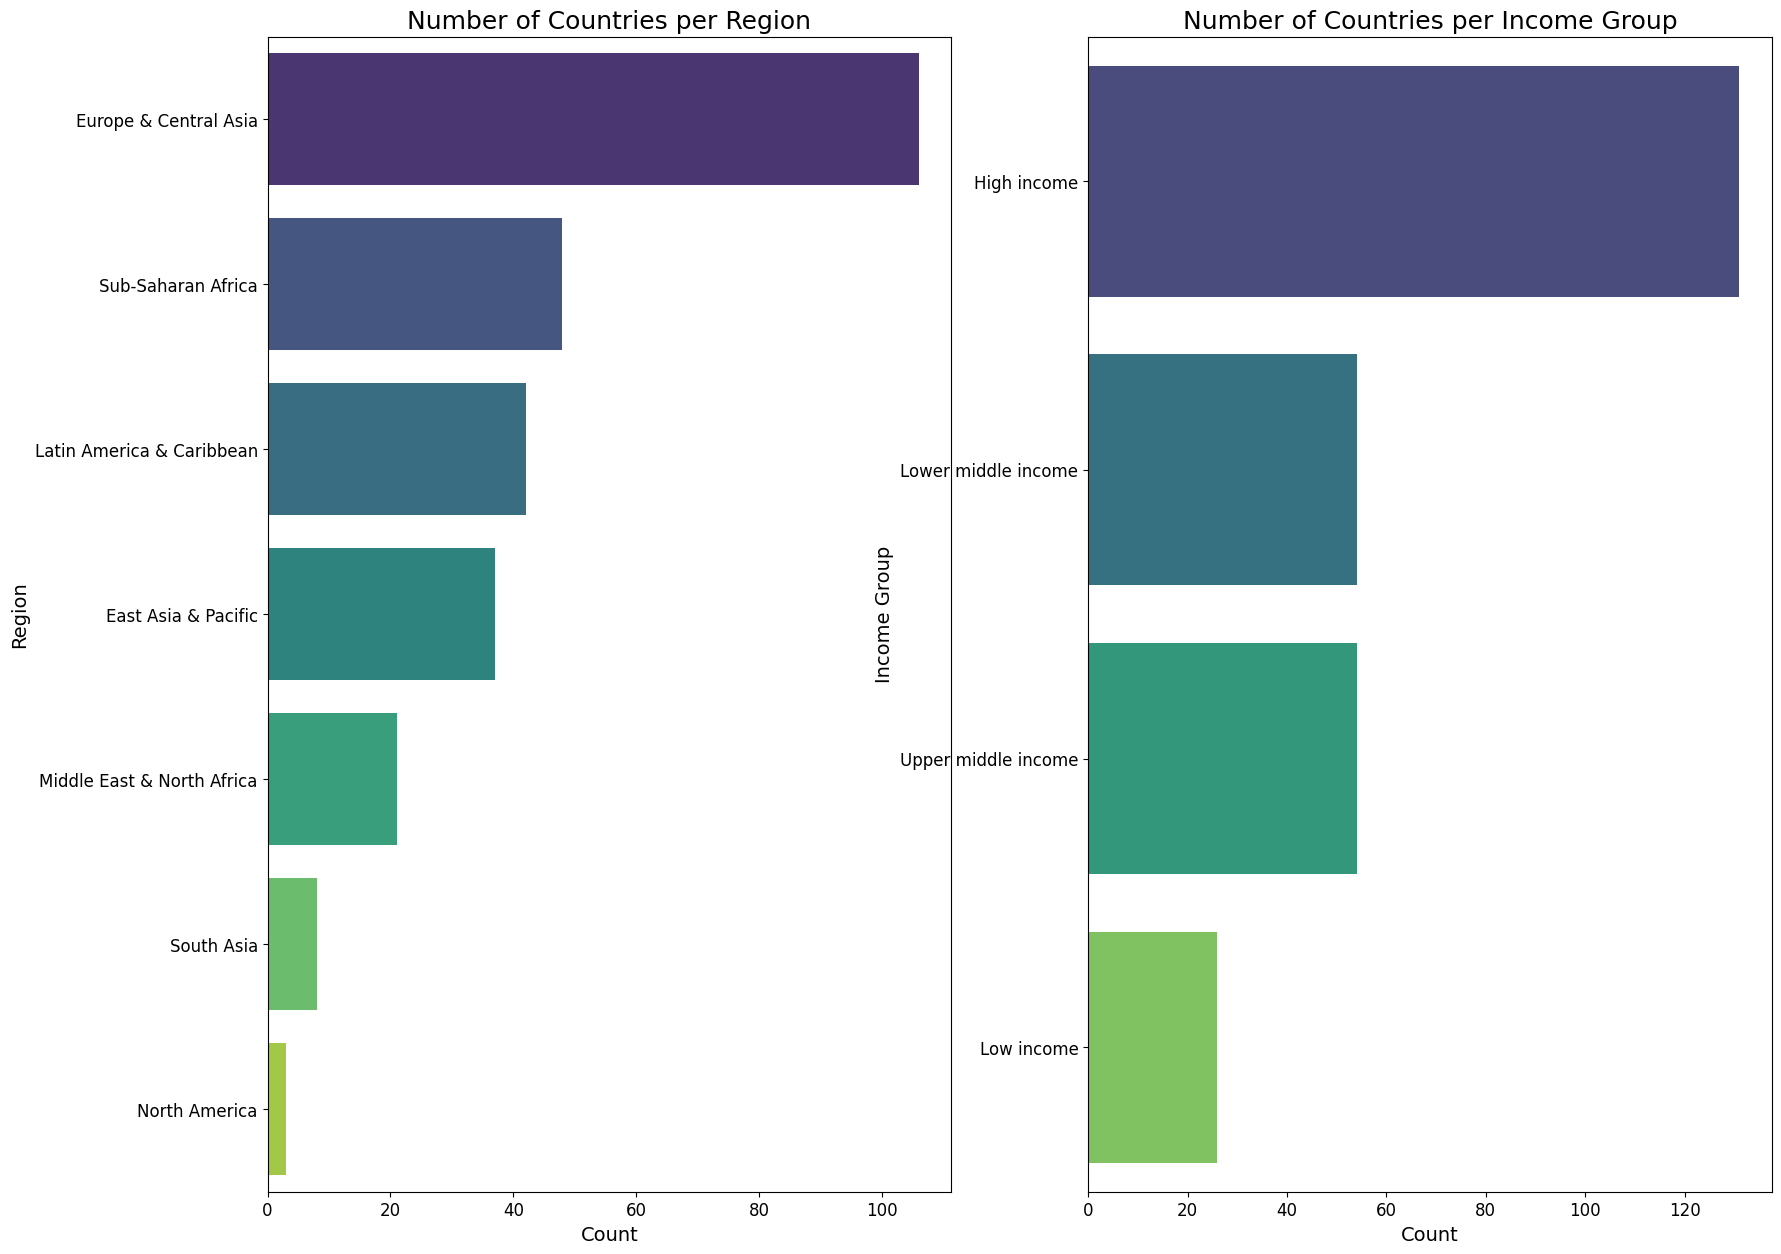

In [11]:
plt.figure(figsize=(30, 15))

# Bar chart for 'Region'
plt.subplot(1, 3, 1)
sns.countplot(y='Region', data=df2, order=df2['Region'].value_counts().index, palette='viridis')
plt.title('Number of Countries per Region', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Bar chart for 'IncomeGroup'
plt.subplot(1, 3, 2)
sns.countplot(y='IncomeGroup', data=df2, order=df2['IncomeGroup'].value_counts().index, palette='viridis')
plt.title('Number of Countries per Income Group', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



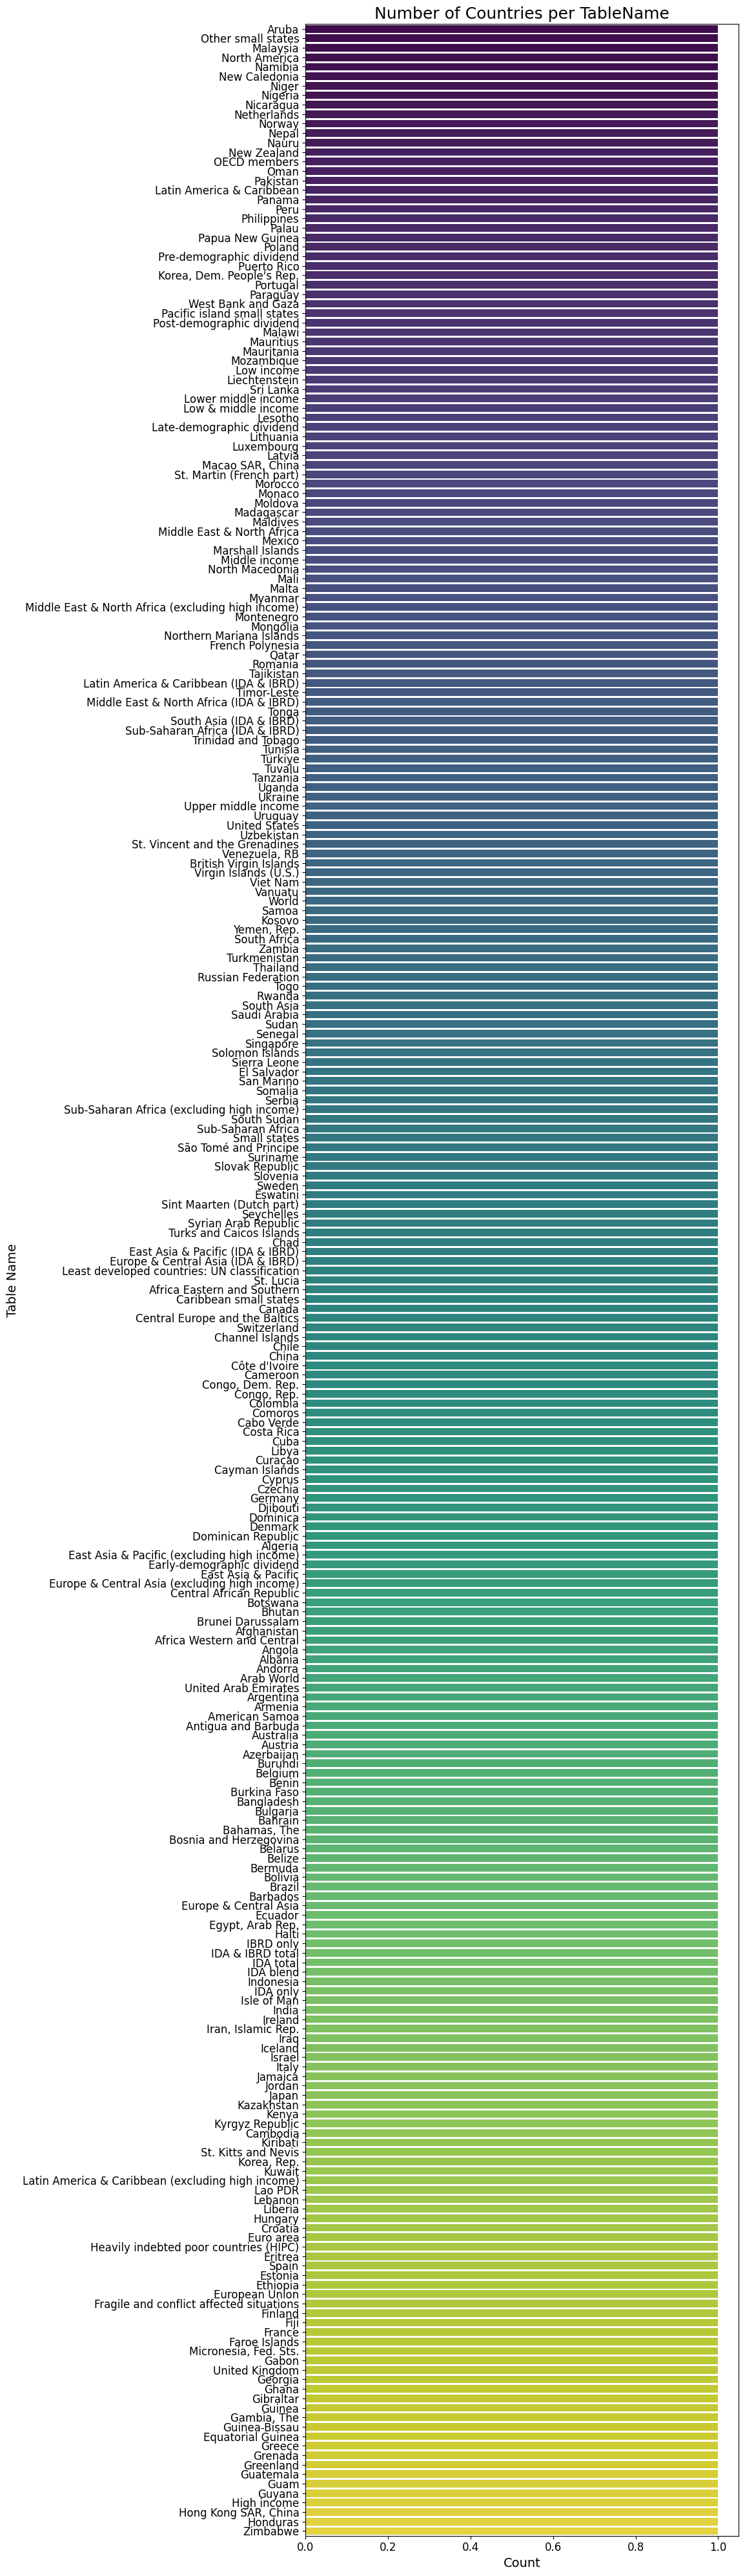

In [12]:
# Bar chart for 'TableName'
plt.figure(figsize=(30, 40))
plt.subplot(1, 3, 3)
sns.countplot(y='TableName', data=df2, order=df2['TableName'].value_counts().index, palette='viridis')
plt.title('Number of Countries per TableName', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Table Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

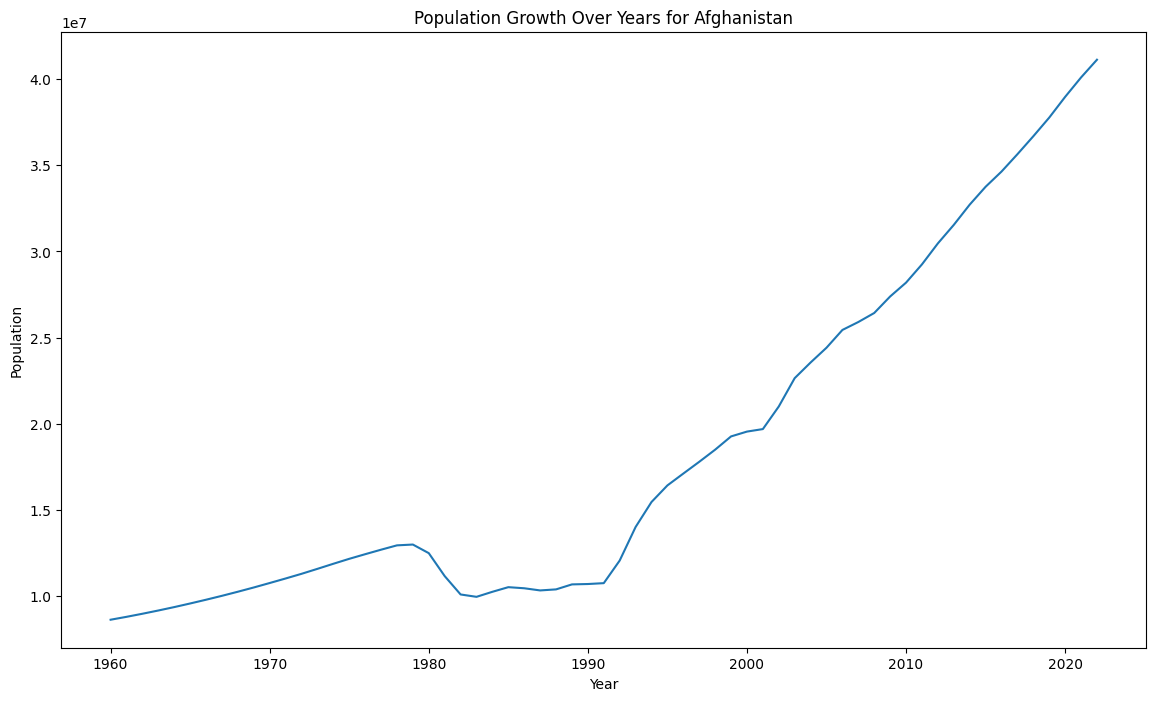

In [13]:
df3_melted = df3.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                      var_name='Year', value_name='Population')

# Convert Year to integer
df3_melted['Year'] = df3_melted['Year'].astype(int)

# Plotting the line plot for a specific country
country_name = 'Afghanistan'
df_country = df3_melted[df3_melted['Country Name'] == country_name]

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Population', data=df_country)
plt.title(f'Population Growth Over Years for {country_name}')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

### Custom country population growth visualization

In [14]:
year = 2022
df_year = df3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', str(year)]]

plt.figure(figsize=(130, 130))
sns.barplot(x='Country Name', y=str(year), data=df_year)
plt.title(f'Population Comparison in {year}')
plt.xlabel('Country Name')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

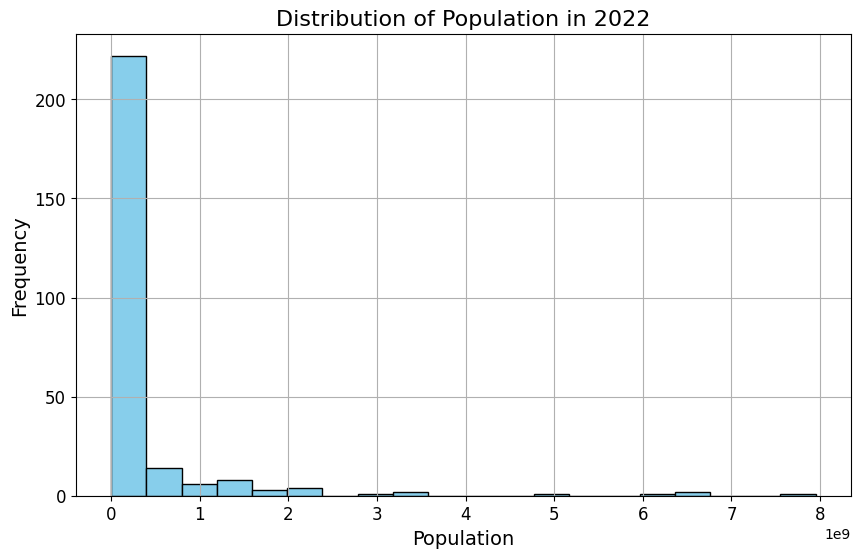

In [17]:
year = '2022'

# Extract population data for the chosen year
population_data = df3[year].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(population_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of Population in {year}', fontsize=16)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### Most of the countries have population less than 2* (10^9)